<a href="https://colab.research.google.com/github/sahoopuspanjali/PracticalMachineLearning/blob/master/ConvLeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install --upgrade tensorflow


     |████████████████████████████████| 86.3MB 38kB/s 
     |████████████████████████████████| 3.8MB 32.5MB/s 
     |████████████████████████████████| 450kB 43.6MB/s 
     |████████████████████████████████| 81kB 8.7MB/s 
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.6.3 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled

In [0]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [0]:
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt

In [0]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


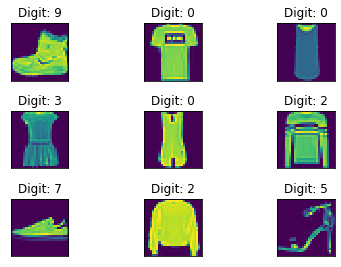

In [0]:
fig = plt.figure()

for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], interpolation='none')
  plt.title('Digit: {}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [0]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [0]:
X_train.shape

(60000, 28, 28, 1)

In [0]:
inputs = keras.Input(shape=(28,28,1))
l1 = keras.layers.Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'relu', input_shape = (28,28,1))(inputs)
l2 = keras.layers.MaxPooling2D(pool_size = 2, strides = 2)(l1)
l3 = keras.layers.Conv2D(filters = 16, kernel_size = 5, strides = 1, activation = 'relu', input_shape = (28,28,1))(l2)
l4 = keras.layers.MaxPooling2D(pool_size = 2, strides = 2)(l3)
l5 = keras.layers.Flatten()(l4)
l6 = keras.layers.Dense(units = 120, activation = 'relu')(l5)
l7 = keras.layers.Dense(units = 84, activation = 'relu')(l6)
outputs = keras.layers.Dense(units = 10, activation = 'softmax')(l7)

In [0]:
func_model = keras.Model(inputs,outputs)
func_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'] )

In [0]:
h = func_model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 30s 624us/sample - loss: 0.1370 - accuracy: 0.9522 - val_loss: 0.6303 - val_accuracy: 0.8866
Epoch 2/30
48000/48000 [==============================] - 30s 633us/sample - loss: 0.1466 - accuracy: 0.9487 - val_loss: 0.6226 - val_accuracy: 0.8910
Epoch 3/30
48000/48000 [==============================] - 30s 631us/sample - loss: 0.1654 - accuracy: 0.9464 - val_loss: 0.6593 - val_accuracy: 0.8862
Epoch 4/30
48000/48000 [==============================] - 30s 634us/sample - loss: 0.1280 - accuracy: 0.9542 - val_loss: 0.7085 - val_accuracy: 0.8823
Epoch 5/30
48000/48000 [==============================] - 30s 635us/sample - loss: 0.1323 - accuracy: 0.9540 - val_loss: 0.6580 - val_accuracy: 0.8922
Epoch 6/30
48000/48000 [==============================] - 30s 635us/sample - loss: 0.1259 - accuracy: 0.9560 - val_loss: 0.5511 - val_accuracy: 0.8844
Epoch 7/30
48000/48000 [====================

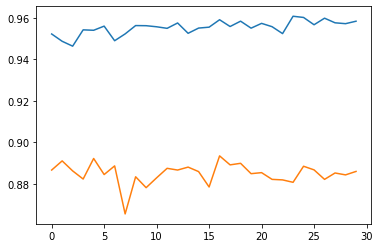

In [0]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.show()